In [1]:
import torch
from torch import nn

In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(111)

In [4]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:,0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels = torch.zeros (train_data_length)
train_set = [(train_data[i],train_labels[i]) for i in range(train_data_length)]

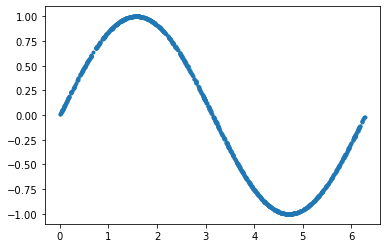

In [5]:
plt.plot(train_data[:,0], train_data[:,1], '.')

In [6]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [8]:
discriminator = Discriminator()

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [10]:
generator = Generator()

In [11]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [12]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [13]:
#This data will be used to train discriminator
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        real_samples_labels = torch.ones((batch_size,1))
        latent_space_samples = torch.ones((batch_size,2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.ones((batch_size,1))
        all_samples = torch.cat((real_samples,generated_samples))
        all_samples_labels = torch.cat((real_samples_labels,generated_samples_labels))

In [14]:
#Train the discriminator
discriminator.zero_grad() #clear the gradients so they don't get accumulated
output_discriminator = discriminator(all_samples)
loss_discriminator = loss_function(
output_discriminator, all_samples_labels)
loss_discriminator.backward()
optimizer_discriminator.step()

In [15]:
#Train the generator
generator.zero_grad()  #clear the gradients so they don't get accumulated
generated_samples = generator(latent_space_samples)
output_discriminator_generated = discriminator(generated_samples)
loss_generator = loss_function(
output_discriminator_generated, real_samples_labels
)
loss_generator.backward()
optimizer_generator.step()

In [16]:
if epoch % 10 == 0 and n == batch_size - 1:
    print(f"Epoch: {epoch} Loss D: {loss_discriminator}")
    print(f"Epoch: {epoch} Loss G: {loss_generator}")

In [17]:
latent_space_samples = torch.randn(100,2)
generated_samples = generator(latent_space_samples)

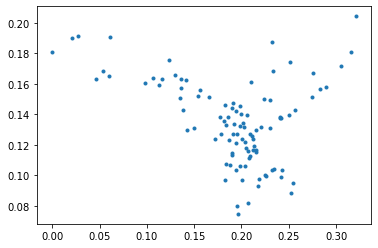

In [19]:
generated_samples = generated_samples.detach()   #To return a tensor from the Pytorch
plt.plot(generated_samples[:,0], generated_samples[:,1], ".")